In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [10]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


# Number of unique comapny names

In [9]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [7]:
df['Company Name'].nunique()

439

# Number of jobs in Queens

In [23]:
df[df['Borough'] == 'Queens'].index.size

173

# Number of unique email domains

In [162]:
def filter_email_format(row):
    return len(row.split('@',1))>1

In [169]:
def get_domain(row):
    return row.split('@',1)[1]

In [165]:
filter_naemails = df['company email'].dropna()

In [166]:
filter_shortemails = filter_naemails[filter_naemails.apply(filter_email_format)]

In [172]:
filter_shortemails.apply(get_domain).nunique()

356

# Total savings and total fulltime jobs for NTAs with at least 5 businesses

In [216]:
ntas = df.groupby('NTA')['Company Name'].agg([len])

In [276]:
ntas_gt5 = ntas[ntas.len >= 5]
ntas_gt5_idx = ntas_gt5.index

In [269]:
savings = df.groupby('NTA')['Total Savings'].mean()

In [294]:
savings_gt5 = savings[ntas_gt5_idx]

In [292]:
jobs = df.groupby('NTA')['Current fulltime'].mean()

In [295]:
jobs_gt5 = jobs[ntas_gt5_idx]

In [309]:
result = pd.concat([savings_gt5, jobs_gt5], axis=1)

In [310]:
result.to_csv('savings_result.csv')

Text(0, 0.5, 'Average savings')

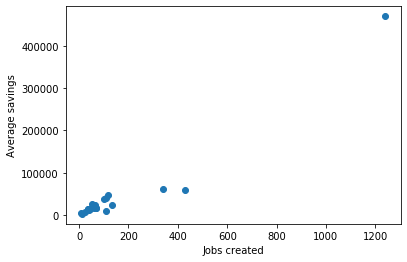

In [314]:
plt.scatter(jobs_gt5, savings_gt5)
plt.xlabel('Jobs created')
plt.ylabel('Average savings')

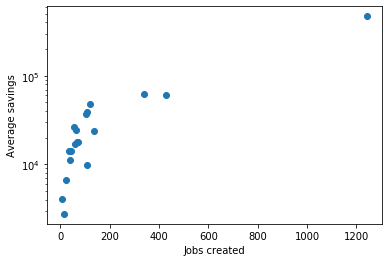

In [321]:
fig, ax = plt.subplots()
ax.scatter(jobs_gt5, savings_gt5)
ax.set_xlabel('Jobs created')
ax.set_ylabel('Average savings')
ax.set_yscale('log')

Text(0, 0.5, 'Counts')

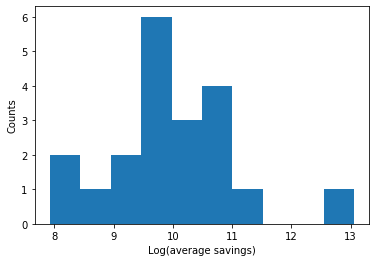

In [330]:
plt.hist(np.log(savings_gt5), bins=10)
plt.xlabel('Log(average savings)')
plt.ylabel('Counts')